In [17]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#-----------------------------runs for 8 iterations, opt on nightlybuild version, no ncp info ------------------------
ori_8 = \
np.load(r"C:\Users\guijo\Desktop\Work\My_edited_scripts\tests_data\original_4.2_with_mulscat\ori_spec3-134_iter8_par_chi_nit.npz")
opt_8 = \
np.load(r"C:\Users\guijo\Desktop\Work\My_edited_scripts\tests_data\optimized_6.0_with_mulscat\opt_spec3-134_iter8_par_chi_nit.npz")
#The version for the 8 iterations is the same as for 4 iterations, so we can use the data on this one exclusively

#-----------------------------4 iterations, no nighltybuild, includes array for ncp ---------------------------
opt_ncp = np.load(r"C:\Users\guijo\Desktop\Work\My_edited_scripts\tests_data\optimized_6.0_with_mulscat\opt_spec3-134_iter4_ncp.npz")
ori_ncp = np.load(r"C:\Users\guijo\Desktop\Work\My_edited_scripts\tests_data\original_4.2_with_mulscat\ori_spec3-134_iter4_ncp.npz")

#-----------------------------4 iterations, nightlybuild version, includes ncp---------------
opt_ncp_night = \
np.load(r"C:\Users\guijo\Desktop\Work\My_edited_scripts\tests_data\optimized_6.0_with_mulscat\opt_spec3-134_iter4_ncp_nightlybuild.npz")

#---------------testing functions---------------------------
def test_how_much_equal(A, B, iter_threshold=4):
    """Compares all results of scripts and shows how mmuch they differ
       Original script needs to be in the place of B"""
    
    print("-----------------------------NEW COMPARISON-----------------------------------")
    for key in A:
        try:
            print("----------", key, "-----------")
            A_data = A[key][:iter_threshold]
            B_data = B[key][:iter_threshold]
            
            if key == "all_tot_ncp":
                B_data = B_data[:, :, :-1]
            if key == "all_indiv_ncp":
                B_data = B_data[:, :, :, :-1]            

            for i, (A_i, B_i) in enumerate(zip(A_data, B_data)):
                tot_mask = ~ np.isclose(A_i, B_i, rtol=0.0001, equal_nan=True)   
                print("For iteration", i, ":")
                print("No of diff values: ",tot_mask.sum(),"out of ",tot_mask.size,f" ie {100*tot_mask.sum()/tot_mask.size:.1f} %")
        except KeyError:
            pass

#test_how_much_equal(ori_ncp, ori_8)   
#ie we confirm that ori_8 and ori_ncp give exactly the same results
test_how_much_equal(opt_ncp, ori_ncp)

#test_how_much_equal(opt_ncp, opt_ncp_night)
#so the multiscattering correction is different for the nightly build version
#FIND A WAY TO SHOW THIS DISCREPANCY


-----------------------------NEW COMPARISON-----------------------------------
---------- all_fit_workspaces -----------
For iteration 0 :
No of diff values:  0 out of  19140  ie 0.0 %
For iteration 1 :
No of diff values:  224 out of  19140  ie 1.2 %
For iteration 2 :
No of diff values:  6315 out of  19140  ie 33.0 %
For iteration 3 :
No of diff values:  763 out of  19140  ie 4.0 %
---------- all_spec_best_par_chi_nit -----------
For iteration 0 :
No of diff values:  244 out of  1980  ie 12.3 %
For iteration 1 :
No of diff values:  272 out of  1980  ie 13.7 %
For iteration 2 :
No of diff values:  872 out of  1980  ie 44.0 %
For iteration 3 :
No of diff values:  336 out of  1980  ie 17.0 %
---------- all_mean_widths -----------
For iteration 0 :
No of diff values:  1 out of  4  ie 25.0 %
For iteration 1 :
No of diff values:  2 out of  4  ie 50.0 %
For iteration 2 :
No of diff values:  2 out of  4  ie 50.0 %
For iteration 3 :
No of diff values:  3 out of  4  ie 75.0 %
---------- all_mean

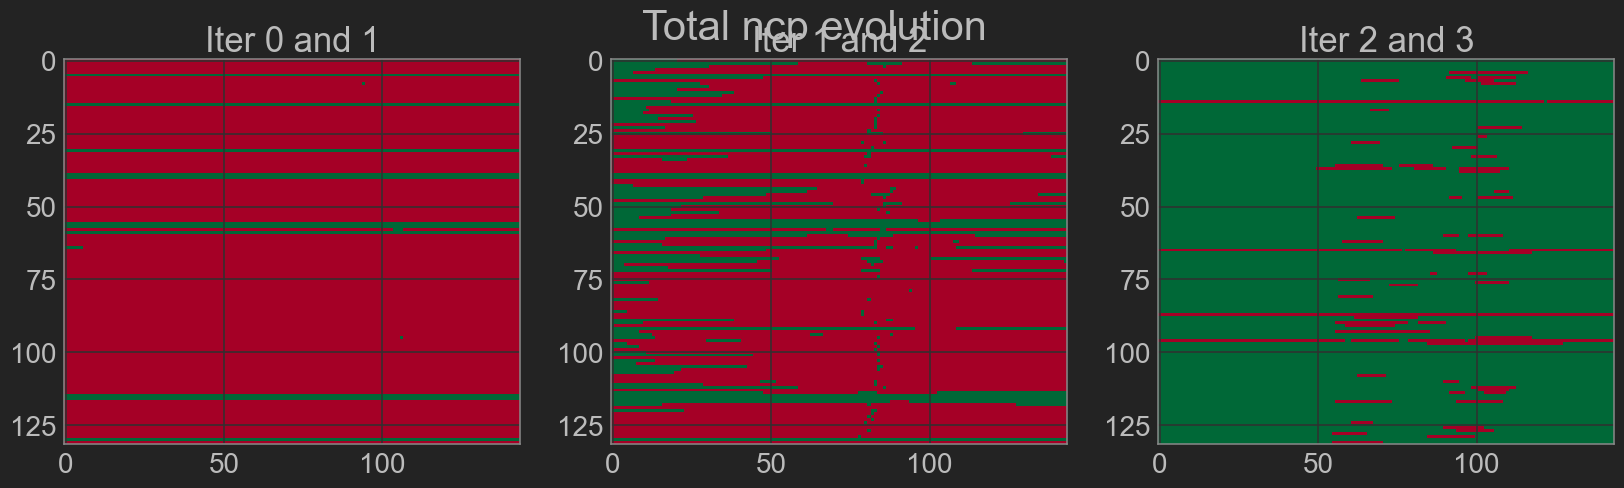

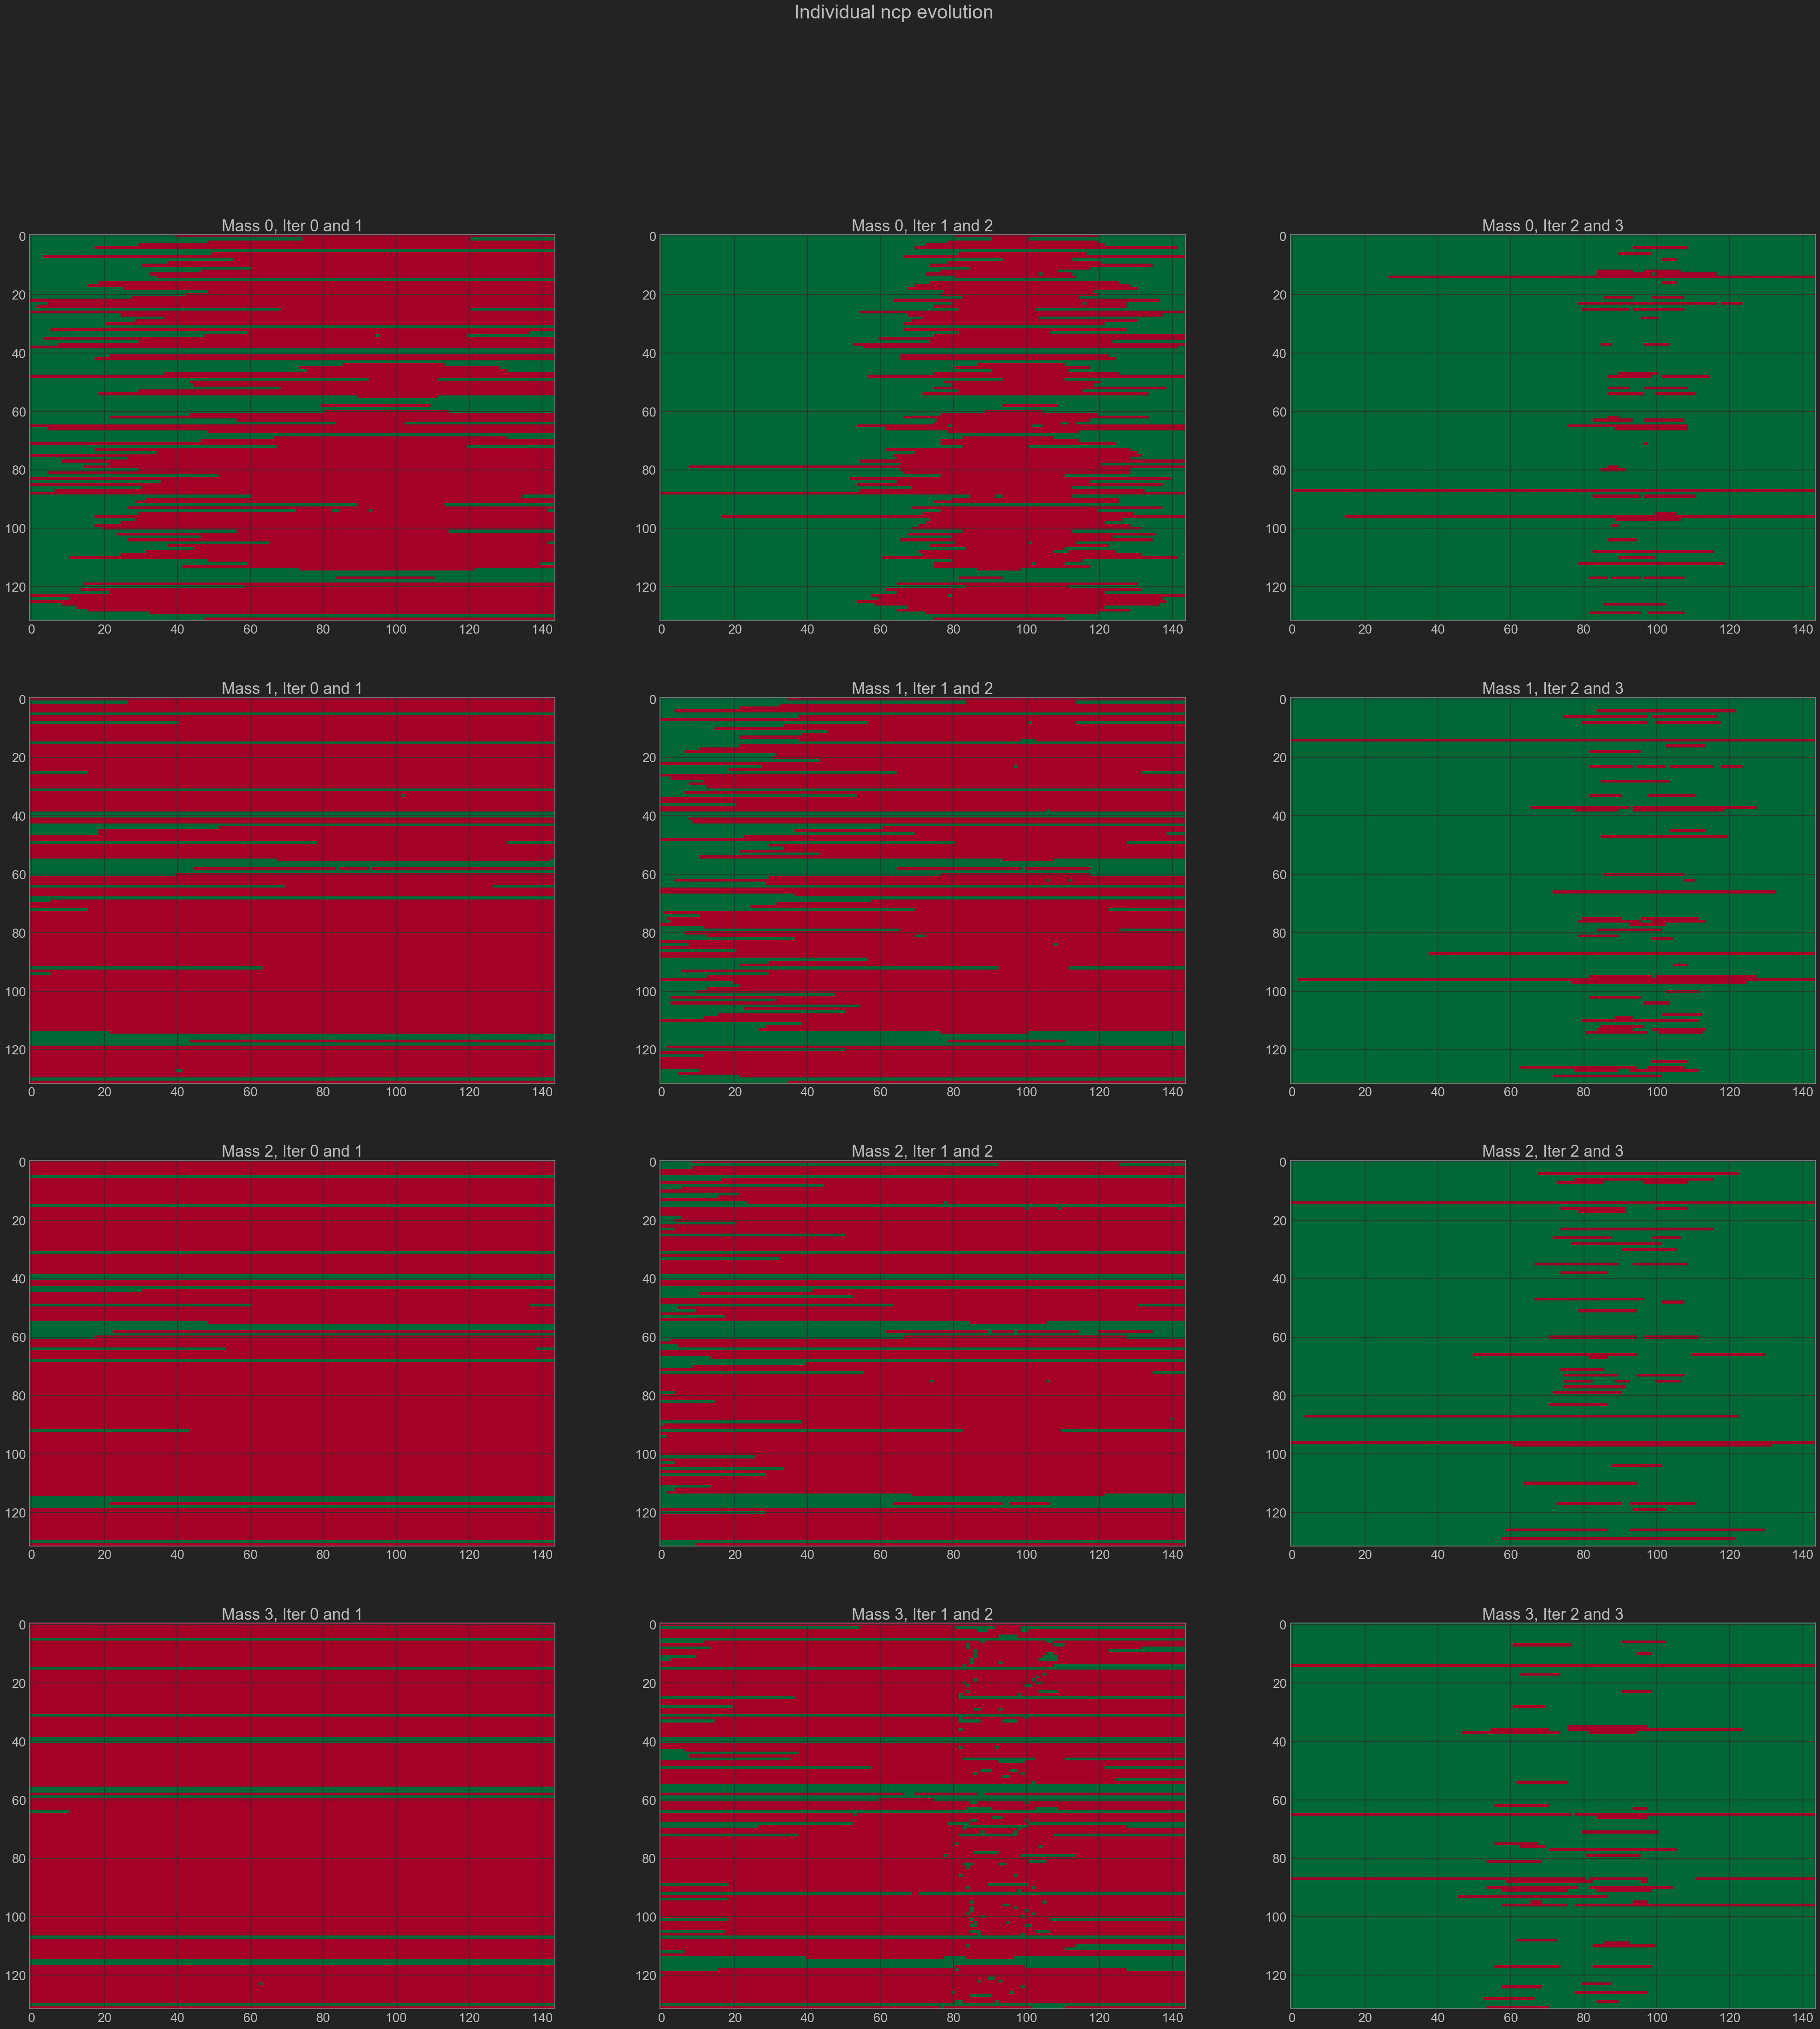



-------------------EVOLUTION OF MS CORRECTION FOR SINGLE SCRIPT-------------------
-----------------Comparison between consecutive iterations-----------------
----------- all_fit_workspaces -------------
iter  0 and  1
No of diff values:  8987 out of  19140  ie 47.0 %
iter  1 and  2
No of diff values:  6607 out of  19140  ie 34.5 %
iter  2 and  3
No of diff values:  899 out of  19140  ie 4.7 %
----------- all_spec_best_par_chi_nit -------------
iter  0 and  1
No of diff values:  1058 out of  1980  ie 53.4 %
iter  1 and  2
No of diff values:  888 out of  1980  ie 44.8 %
iter  2 and  3
No of diff values:  329 out of  1980  ie 16.6 %
----------- all_mean_widths -------------
iter  0 and  1
No of diff values:  4 out of  4  ie 100.0 %
iter  1 and  2
No of diff values:  2 out of  4  ie 50.0 %
iter  2 and  3
No of diff values:  3 out of  4  ie 75.0 %
----------- all_mean_intensities -------------
iter  0 and  1
No of diff values:  4 out of  4  ie 100.0 %
iter  1 and  2
No of diff values:  4

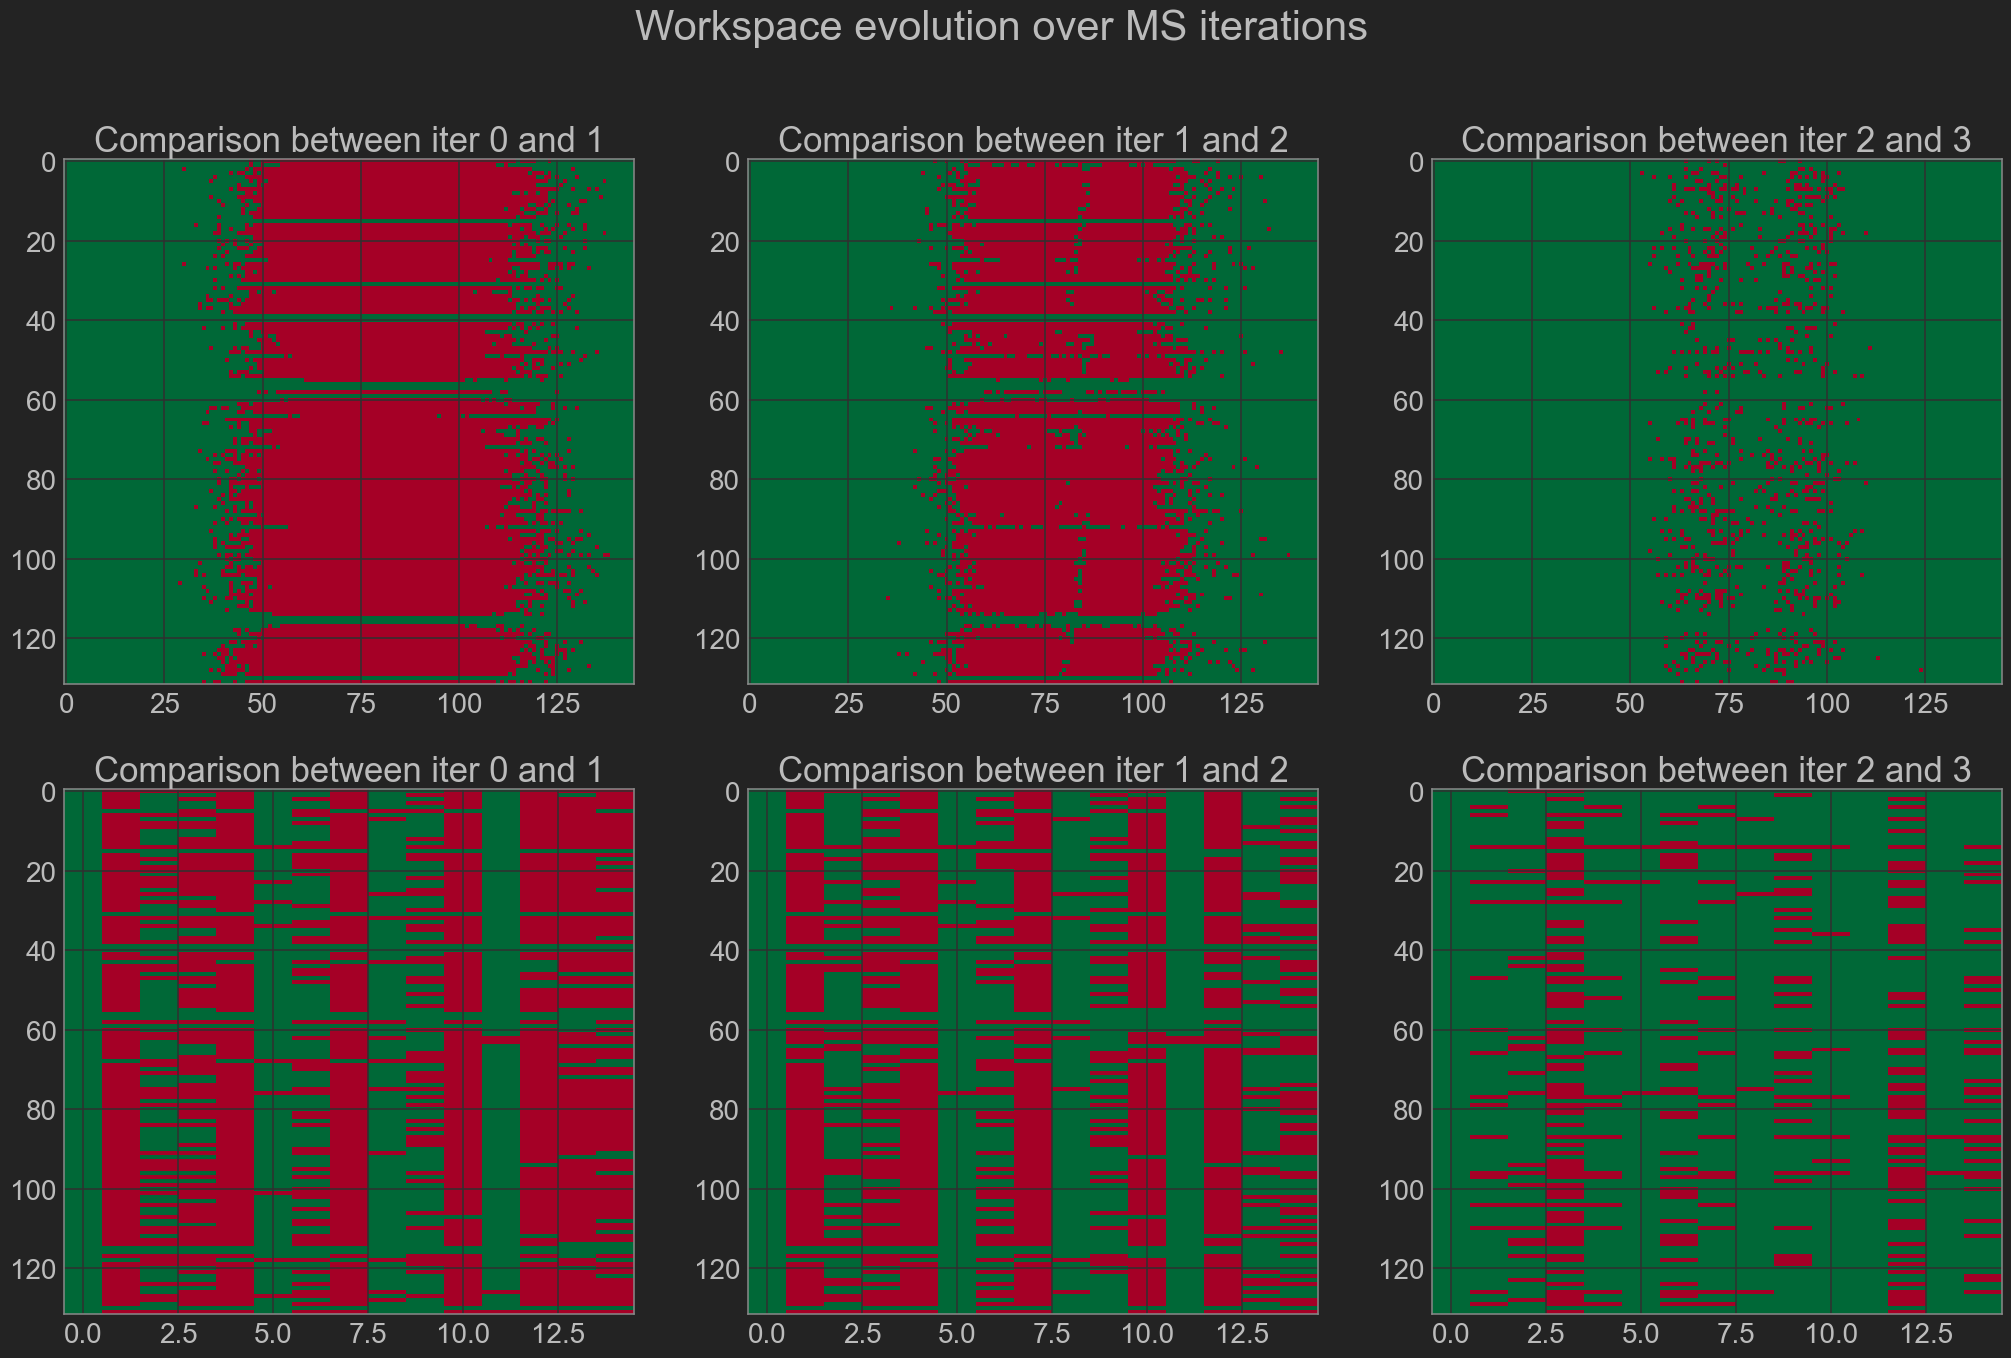


--------------------Comparison with the initial workspace/params----------------------
----------- all_fit_workspaces -------------
iter 0 and  0
No of diff values:  0 out of  19140  ie 0.0 %
iter 0 and  1
No of diff values:  8987 out of  19140  ie 47.0 %
iter 0 and  2
No of diff values:  9018 out of  19140  ie 47.1 %
iter 0 and  3
No of diff values:  9018 out of  19140  ie 47.1 %
----------- all_spec_best_par_chi_nit -------------
iter 0 and  0
No of diff values:  0 out of  1980  ie 0.0 %
iter 0 and  1
No of diff values:  1058 out of  1980  ie 53.4 %
iter 0 and  2
No of diff values:  1060 out of  1980  ie 53.5 %
iter 0 and  3
No of diff values:  1052 out of  1980  ie 53.1 %
----------- all_mean_widths -------------
iter 0 and  0
No of diff values:  0 out of  4  ie 0.0 %
iter 0 and  1
No of diff values:  4 out of  4  ie 100.0 %
iter 0 and  2
No of diff values:  4 out of  4  ie 100.0 %
iter 0 and  3
No of diff values:  4 out of  4  ie 100.0 %
----------- all_mean_intensities ----------

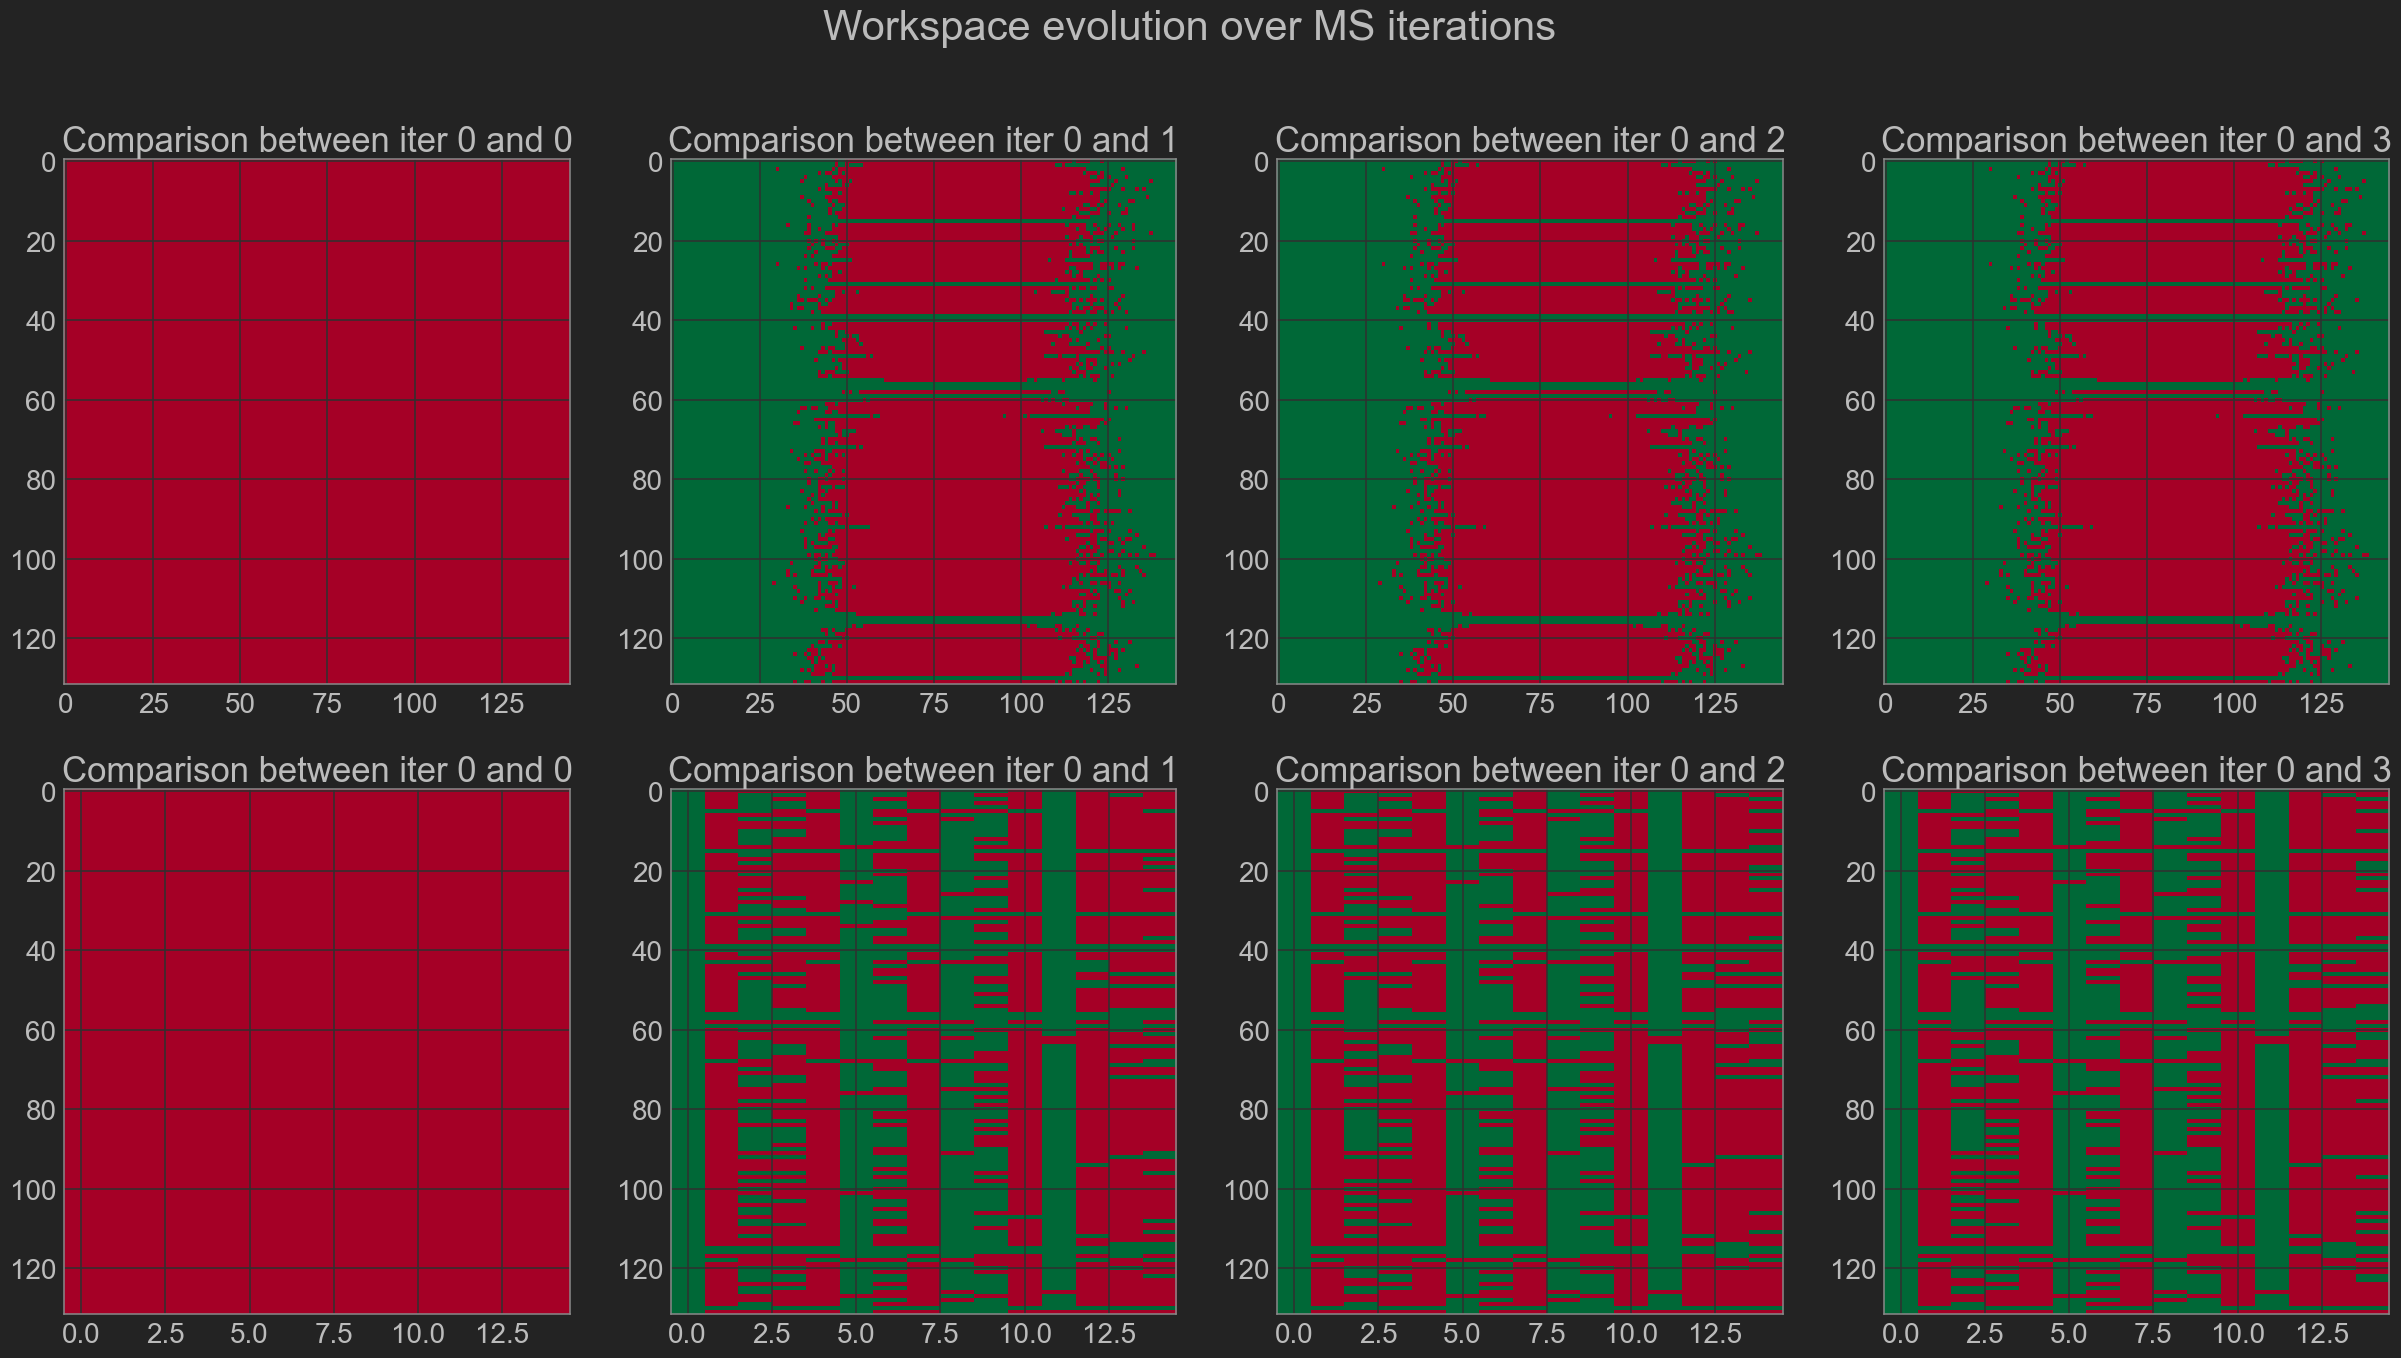

In [21]:
def test_equality_visual(opt, ori, rel_tol=0.0001, masses_len=4, iter_threshold=4):
    """compares the results of optimized script with original script,
    with the MS iterations included"""
    
    print("\n---------------COMPARISON BETWEEN SCRIPTS OVER MS ITERATIONS-----------------")

    #plot images to show comparison
    fig0, axs = plt.subplots(3, iter_threshold, figsize=(30, 20))
    for j, key in enumerate(["all_fit_workspaces", "all_spec_best_par_chi_nit", "all_tot_ncp"]):
        try:
            opt_data = opt[key][:iter_threshold]
            ori_data = ori[key][:iter_threshold]
            if key == "all_tot_ncp":        #take out last collum of original
                ori_data = ori_data[:, :, :-1]
                
            for i, (opt_i, ori_i) in enumerate(zip(opt_data, ori_data)):
                tot_mask = np.isclose(opt_i, ori_i, rtol=rel_tol, equal_nan=True)

                axs[j, i].imshow(tot_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
                axs[j, i].set_title(key+", iter "+str(i))  
        except KeyError:
            pass
    fig0.suptitle("Comparison between opt and ori")
    plt.show()   

#test_equality_visual(opt_ncp, ori_ncp, 0.0001) 

def plot_ms_convergence(opt, ori, masses_len=4):
    """plots the results for the mean widths and intensities over the iteration number"""
    
    np.set_printoptions(suppress=True, precision=8, linewidth= 150 )    
    for key in ["all_mean_widths", "all_mean_intensities"]:
        print("\nFinal value for "+key+":")
        opt_data = opt[key]
        ori_data = ori[key]
        for i, (opt_i, ori_i) in enumerate(zip(opt_data, ori_data)):
            print("Iteration ", i, ":\nori: ", ori_i, "\nopt: ", opt_i)
            
    #create plot to show convergence of values due to MS correction
    fig2, axs = plt.subplots(2, masses_len, figsize=(35, 15), sharex=True)
    for j, key in enumerate(["all_mean_widths", "all_mean_intensities"]):
        opt_data = opt[key]    
        ori_data = ori[key]
        for i in range(masses_len):
            axs[j, i].plot(range(len(opt_data)), opt_data[:, i], label="opt", linewidth=3)
            axs[j, i].plot(range(len(ori_data)), ori_data[:, i], label="ori", linewidth=3)
            axs[j, i].set_title(key[4:]+", Mass no "+str(i+1))
            #axs[j, i].set_xlabel("iteration")
    fig2.suptitle("Evolution of mean widths and intensities over iterations")
    fig2.legend(loc="upper right", bbox_to_anchor=(0.96, 0.9))
    plt.show()

#plot_ms_convergence(opt_ncp_night, ori_ncp)
#plot_ms_convergence(opt_8, ori_8)

def ncp_evo(mul, no_iterations=4):
    """Works only for workspaces that include arrays for the ncp
    Plots the difference between mulscat iterations"""
    
    all_tot_ncp = mul["all_tot_ncp"]
    all_indiv_ncp = mul["all_indiv_ncp"]
    
    fig4, axs_tot = plt.subplots(1, no_iterations-1, figsize=(20, 5))
    fig5, axs_indiv = plt.subplots(4, no_iterations-1, figsize=(50, 50))
    for i in range(len(all_tot_ncp)-1):
        tot_prev = all_tot_ncp[i]
        tot_next = all_tot_ncp[i+1]            
        tot_mask = np.isclose(tot_prev, tot_next, rtol=0.0001, equal_nan=True)

        axs_tot[i].imshow(tot_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
        axs_tot[i].set_title("Iter "+str(i)+" and "+str(i+1))     
        
        for j in range(len(all_indiv_ncp[0])):
            indiv_prev = all_indiv_ncp[i, j]
            indiv_next = all_indiv_ncp[i+1, j]
            indiv_mask = np.isclose(indiv_prev, indiv_next, rtol=0.0001, equal_nan=True)
            
            axs_indiv[j, i].imshow(indiv_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
            axs_indiv[j, i].set_title("Mass "+str(j)+", Iter "+str(i)+" and "+str(i+1))              

    fig4.suptitle("Total ncp evolution")
    fig5.suptitle("Individual ncp evolution")
    plt.show() 

ncp_evo(opt_ncp)

def evo_mulscat(mul, no_iterations=4):
    """shows the evolution of the MS correction over the iterations for that script"""
    print("\n\n-------------------EVOLUTION OF MS CORRECTION FOR SINGLE SCRIPT-------------------")
    
    print("-----------------Comparison between consecutive iterations-----------------")
    for key in mul:
        print("-----------", key, "-------------")
        
        for i in range(len(mul[key])-1):
            print("iter ", i, "and ", i+1)
            data = mul[key]
            before = data[i]
            after = data[i+1]
            tot_mask = ~ np.isclose(before, after, rtol=0.0001, equal_nan=True)
            print("No of diff values: ",tot_mask.sum(),"out of ",tot_mask.size,f" ie {100*tot_mask.sum()/tot_mask.size:.1f} %")
    
    fig1, axs = plt.subplots(2, no_iterations-1, figsize=(25, 15))
    for j, key in enumerate(["all_fit_workspaces", "all_spec_best_par_chi_nit"]):
        data = mul[key]
        for i in range(len(data)-1):
            before = data[i]
            after = data[i+1]            
            tot_mask = np.isclose(before, after, rtol=0.0001, equal_nan=True)
            
            axs[j, i].imshow(tot_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
            axs[j, i].set_title("Comparison between iter "+str(i)+" and "+str(i+1))            
    fig1.suptitle("Workspace evolution over MS iterations")
    plt.show()  
    
    print("\n--------------------Comparison with the initial workspace/params----------------------")
    for key in mul:
        print("-----------", key, "-------------")
        
        for i in range(len(mul[key])):
            print("iter 0 and ", i)
            data = mul[key]
            before = data[0]
            after = data[i]
            tot_mask = ~ np.isclose(before, after, rtol=0.0001, equal_nan=True)
            print("No of diff values: ",tot_mask.sum(),"out of ",tot_mask.size,f" ie {100*tot_mask.sum()/tot_mask.size:.1f} %")
    
    fig3, axs = plt.subplots(2, no_iterations, figsize=(30, 15))
    for j, key in enumerate(["all_fit_workspaces", "all_spec_best_par_chi_nit"]):
        data = mul[key]
        for i in range(len(data)):
            before = data[0]
            after = data[i]            
            tot_mask = np.isclose(before, after, rtol=0.0001, equal_nan=True)
            
            axs[j, i].imshow(tot_mask, aspect="auto", cmap=plt.cm.RdYlGn, interpolation="nearest", norm=None)
            axs[j, i].set_title("Comparison between iter 0 and "+str(i))            
    fig3.suptitle("Workspace evolution over MS iterations")
    plt.show()  
            
evo_mulscat(opt_ncp)            

In [11]:
def test_all_par_mulscat(A, B, rel_tol=0.0001):
    """Checks wether parameters are all the same for the results of two different scripts A and B.
    A is the optimizzed one, B is the original one.
    Prints the comparison for all iterarions of MS correction"""
    
    print("\n--------------New Comparison----------------\n")
    print("relative tolerance: ", rel_tol)
    
    new_widths = A["all_mean_widths"]
    new_inten = A["all_mean_intensities"]
    old_widths = B["all_mean_widths"]
    old_inten = B["all_mean_intensities"]
    
    for i, (new_pars, old_pars) in enumerate(zip(A["all_spec_best_par_chi_nit"], B["all_spec_best_par_chi_nit"])):
        
        print("\n---------------------ITERATION ", i, "-------------------------")
        
        tot_mask = ~ np.isclose(new_pars, old_pars, rtol=rel_tol, equal_nan=True)

        chi_mask = tot_mask[:, -2]
        print("no of different chi2: ", chi_mask.sum())
        #print("different chi2 values:\nopt: ",new_pars[chi_mask, -2],"\nori: ", old_pars[chi_mask, -2])
        #print("no of iterations for these chi:\nopt: ",new_pars[chi_mask, -1],"\nori: ", old_pars[chi_mask, -1] )

        nit_mask = tot_mask[:, -1]
        #print("chi2 with different nit:\noptimized:\n",new_pars[nit_mask, -2],"\noriginal:\n", old_pars[nit_mask, -2])
        #print("different nit values:\nopt: ",new_pars[nit_mask, -1],"\nori: ", old_pars[nit_mask, -1] )
        print("no of different nit: ", nit_mask.sum(), " out of total ", nit_mask.size, "rows")

        bigger_nit_mask = new_pars[nit_mask, -1] >  old_pars[nit_mask, -1]
        print("no of diff nit where nit opt > nit ori: ", bigger_nit_mask.sum(), f"i.e. {100*bigger_nit_mask.sum()/nit_mask.sum():.2f} %")

        pars_mask = tot_mask[:, 1:-2]
        row_mask = np.any(pars_mask, axis=1)
        print("no of parameter rows with at least a different value: ", row_mask.sum())

        row_and_nit_mask = row_mask & nit_mask
        print("no of rows with at least one different par and diff nit: ", row_and_nit_mask.sum())

        offvalues_nit_mask = pars_mask[nit_mask, :]
        print("all rows with diff nit have at least on diff par: ", np.all(np.any(offvalues_nit_mask, axis=1)))
        print("\nno of total diff pars: ",pars_mask.sum(), " out of total ", pars_mask.size, f"i.e. {100*pars_mask.sum()/pars_mask.size:.1f}%")

        #--------see how many of the different parameters are positions
        pos_mask = pars_mask[:, 2::3]
        print(f"fraction of diff pars that are positions: {100*pos_mask.sum()/pars_mask.sum():.1f} %")

        print("no of diff pars in rows with diff nit: ", offvalues_nit_mask.sum())
        print(f"probability of getting a diff par given diff nit: {100* offvalues_nit_mask.sum() / offvalues_nit_mask.size:.1f} %")
        print(f"probability of diff nit given it's a diff par: {100* offvalues_nit_mask.sum() / pars_mask.sum():.1f} %")

        print("\nFinal output:\nMean Widths------------\nori: ", old_widths[i], "\nopt: ", new_widths[i])
        print("\nMean Intensity Ratios------------\nori: ", old_inten[i], "\nopt: ", new_inten[i])
        
test_all_par_mulscat(opt_ncp, ori_ncp, rel_tol = 0.001)


--------------New Comparison----------------

relative tolerance:  0.001

---------------------ITERATION  0 -------------------------
no of different chi2:  0
no of different nit:  17  out of total  132 rows
no of diff nit where nit opt > nit ori:  10 i.e. 58.82 %
no of parameter rows with at least a different value:  49
no of rows with at least one different par and diff nit:  13
all rows with diff nit have at least on diff par:  False

no of total diff pars:  74  out of total  1584 i.e. 4.7%
fraction of diff pars that are positions: 85.1 %
no of diff pars in rows with diff nit:  28
probability of getting a diff par given diff nit: 13.7 %
probability of diff nit given it's a diff par: 37.8 %

Final output:
Mean Widths------------
ori:  [17.40915637 20.19047768 12.5633012   9.80090584] 
opt:  [17.39288374 20.19036228 12.56333758  9.80090561]

Mean Intensity Ratios------------
ori:  [0.00529534 0.08436526 0.18587735 0.72446204] 
opt:  [0.0052954  0.08436623 0.18587948 0.72445888]

----